In [34]:
import cv2
import numpy as np
from scipy.ndimage import rotate
from os import listdir
from os.path import isfile, join
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
def filter(fname):
    image = cv2.imread(fname)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # key is to find a binary template before findContours!
    # one option is hsv sat (0, 70)
    val = hsv[:, :, 2]
#     sat = cv2.medianBlur(sat, ksize = 3)
    vmask = cv2.inRange(cv2.medianBlur(val, ksize = 3), 40, 255)/255
    rgbmask = cv2.inRange(image, (40, 40, 40), (255, 255, 255))/255
    print(image.shape, vmask.shape, rgbmask.shape)
    return vmask, rgbmask

(110, 470, 3) (110, 470) (110, 470)
(132, 564, 3) (132, 564) (132, 564)
(127, 541, 3) (127, 541) (127, 541)
(137, 525, 3) (137, 525) (137, 525)
(156, 600, 3) (156, 600) (156, 600)
(140, 608, 3) (140, 608) (140, 608)
(124, 540, 3) (124, 540) (124, 540)
(132, 564, 3) (132, 564) (132, 564)
(143, 550, 3) (143, 550) (143, 550)
(150, 575, 3) (150, 575) (150, 575)


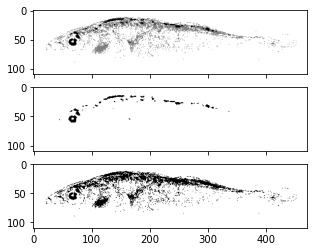

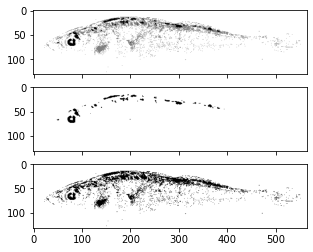

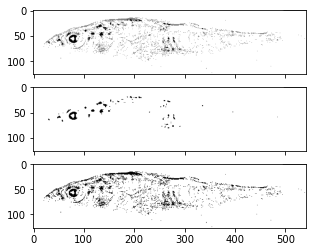

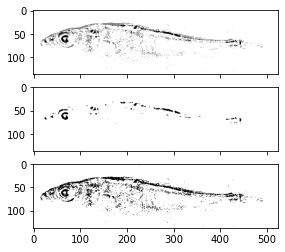

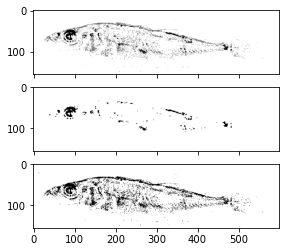

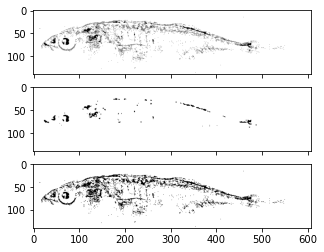

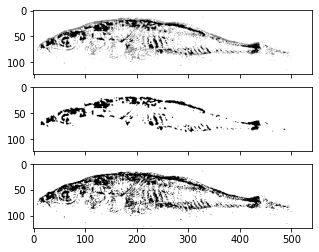

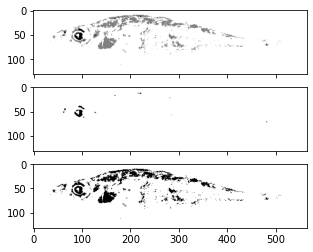

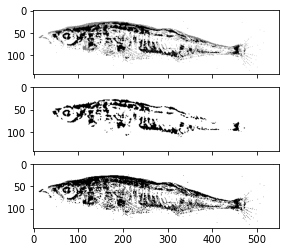

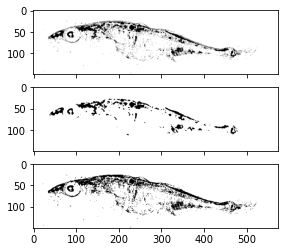

In [36]:
path = "../data/CC Lake extracted/5/"
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
f = onlyfiles[0]

for f in onlyfiles[:10]: 
    vmask, rgbmask = filter(join(path, f))
    comb = (vmask + rgbmask)/2
    
    fig, (ax3, ax4, ax5) = plt.subplots(3, 1, sharex=True)
#     ax1.imshow(hsv[:, :, 0], cmap=plt.cm.gray)
#     ax2.imshow(hsv[:, :, 1], cmap=plt.cm.gray)
    ax3.imshow(comb, cmap=plt.cm.gray)
    ax4.imshow(vmask, cmap=plt.cm.gray)
    ax5.imshow(rgbmask, cmap=plt.cm.gray)

(110, 470, 3) (110, 470) (110, 470)
(132, 564, 3) (132, 564) (132, 564)
(127, 541, 3) (127, 541) (127, 541)
(137, 525, 3) (137, 525) (137, 525)
(156, 600, 3) (156, 600) (156, 600)
(140, 608, 3) (140, 608) (140, 608)
(124, 540, 3) (124, 540) (124, 540)
(132, 564, 3) (132, 564) (132, 564)
(143, 550, 3) (143, 550) (143, 550)
(150, 575, 3) (150, 575) (150, 575)
(127, 541, 3) (127, 541) (127, 541)
(137, 525, 3) (137, 525) (137, 525)
(138, 588, 3) (138, 588) (138, 588)
(163, 625, 3) (163, 625) (163, 625)
(163, 625, 3) (163, 625) (163, 625)
(138, 588, 3) (138, 588) (138, 588)
(143, 550, 3) (143, 550) (143, 550)
DSC00855.JPG
(163, 625, 3) (163, 625) (163, 625)
(163, 625, 3) (163, 625) (163, 625)
(127, 541, 3) (127, 541) (127, 541)
DSC00858.JPG
(121, 517, 3) (121, 517) (121, 517)
DSC00859.JPG
(143, 550, 3) (143, 550) (143, 550)
(143, 550, 3) (143, 550) (143, 550)
(104, 400, 3) (104, 400) (104, 400)
(137, 525, 3) (137, 525) (137, 525)
(124, 475, 3) (124, 475) (124, 475)
DSC00864.JPG
(121, 517, 3

F:\Anaconda\envs\hdda_hw2\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


(132, 564, 3) (132, 564) (132, 564)


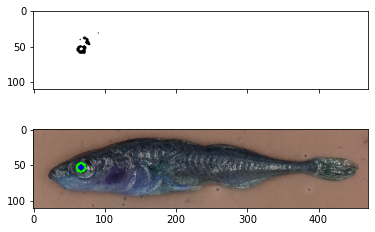

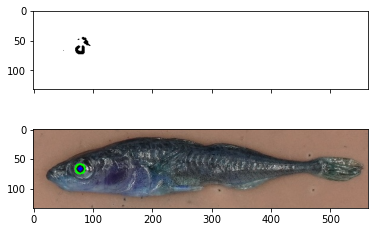

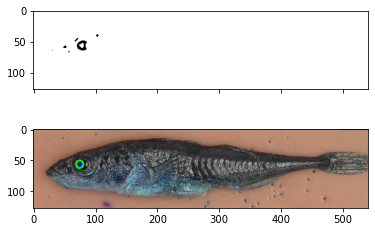

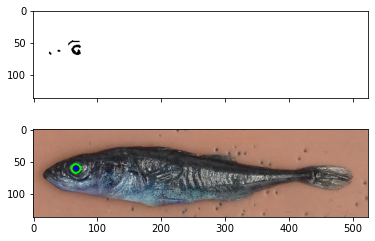

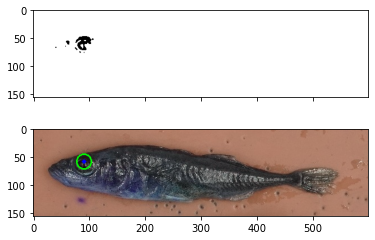

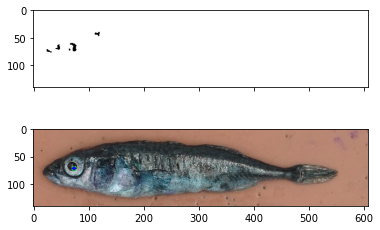

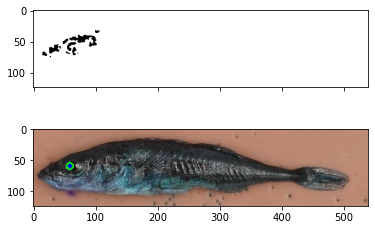

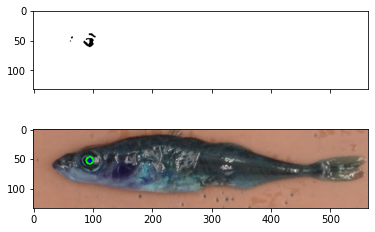

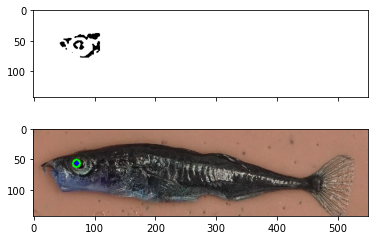

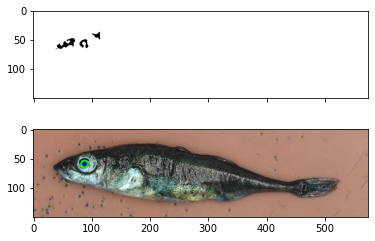

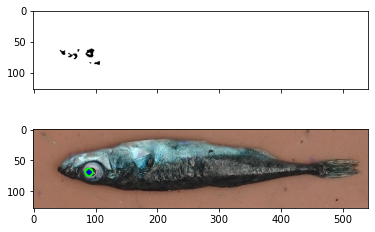

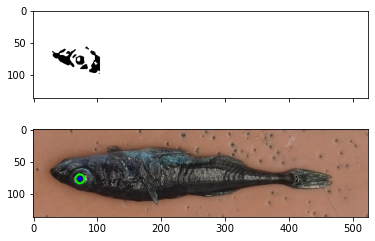

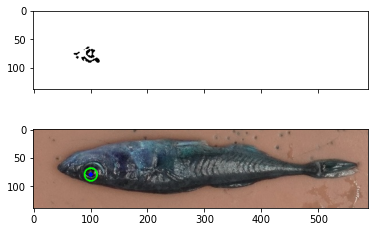

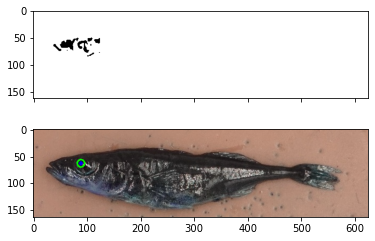

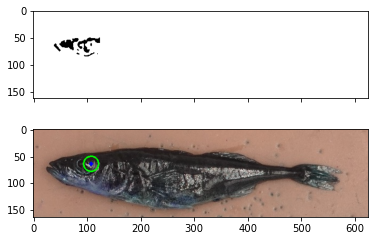

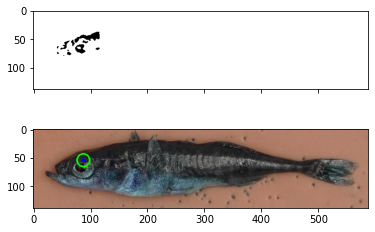

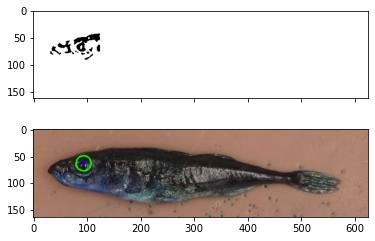

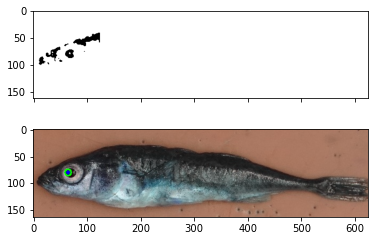

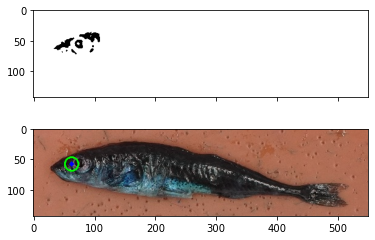

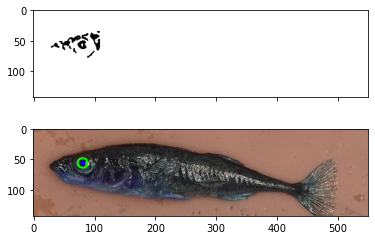

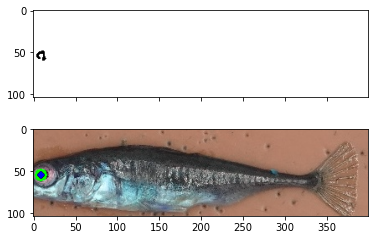

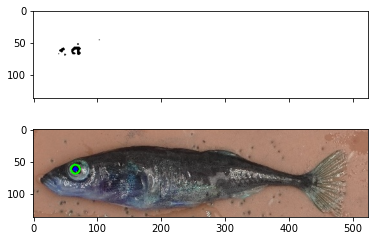

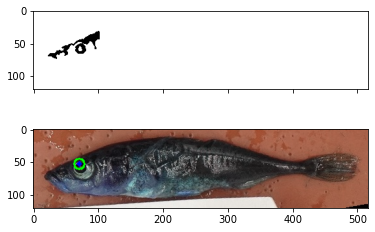

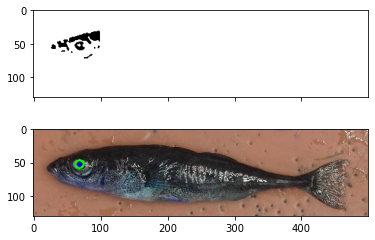

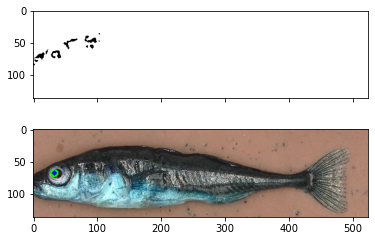

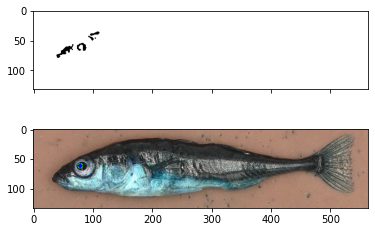

In [37]:
path = "../data/CC Lake extracted/5/"
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

for f in onlyfiles[:30]: 
    image = cv2.imread(join(path, f))
    img = np.copy(image)
    vmask, rgbmask = filter(join(path, f))
    comb = np.uint8(np.maximum(vmask, rgbmask)*255)
    m, n = comb.shape[:2]
    comb[:, n//5:] = 255
    comb = cv2.medianBlur(comb, 3)
#     comb = np.uint8((vmask + rgbmask)/2 * 255)
    circles = cv2.HoughCircles(comb, cv2.HOUGH_GRADIENT, dp = 1, minDist = 100, param1=250, param2=10, minRadius=2, maxRadius=16)
#     circles = np.uint16(np.around(circles))
#     print(type(circles), circles.shape)
    if circles is not None:
        for i in circles[0,:]:
             # draw the outer circle
            cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
            # draw the center of the circle
            cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)
        #    print(circles)
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
        ax1.imshow(comb, cmap=plt.cm.gray)
        ax2.imshow(img)
    else: 
        print(f)

In [38]:
# find circle 
image_gray = 
print(image_gray.shape)
img = np.copy(image)
blur = cv2.medianBlur(image_gray, 5)
circles = cv2.HoughCircles(image_r, cv2.HOUGH_GRADIENT, dp = 1, minDist = 20, param1=50, param2=30, minRadius=10, maxRadius=50)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)

NameError: name 'image_gray' is not defined

In [ ]:
# sat1, rmask = extract(join(path, f))''
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax2.imshow(image_gray, cmap=plt.cm.gray)
ax3.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# ax4.imshow(rmask, cmap=plt.cm.gray)

In [39]:
# using the findcoutours in opencv: 
path = "../data/CC Lake extracted/5/"
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

for f in onlyfiles[:1]:
# for i in ['DSC00840.jpg', 'DSC00841.jpg', 'DSC00842.jpg', 'DSC00843.jpg']:
    path = "../data/CC Lake extracted/5/"
    sat1, rmask = extract(join(path, f))
    image = cv2.imread(join(path, f))

    comb = np.uint8(np.maximum(sat1, 1-rmask)*255)
    contours, hierarchy  = cv2.findContours(comb, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    # get the largest contour element
    cont_dim = []
    for i in contours: 
        cont_dim.append(i.shape[0])
    print(cont_dim)
    idx = np.argmax(cont_dim)
    points = contours[np.argmax(cont_dim)]
    print(points.shape)
    print(np.squeeze(points, axis=1).shape)
    img1 = cv2.drawContours(np.copy(image), points, -1, (0,255,75), 3)
    
    fig, (ax1, ax4) = plt.subplots(2, 1, sharex=True)
    ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax4.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    
    outpath = "../data/contour/findcontour/"
    print(f[:-4])
    outpathcsv = "../data/contour/findcontour_csv/"
    pd.DataFrame(np.squeeze(points, axis=1)).to_csv(join(outpathcsv, f[:-4]+".csv"), index = False, header = False)
#     np.savetxt(join(outpathcsv, f[:-4]+".csv"), np.squeeze(points, axis=1), delimiter=",")
    cv2.imwrite(join(outpath, f), img1)

NameError: name 'extract' is not defined

(35, 40, 3)


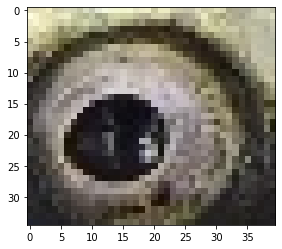

In [64]:
# image1 = cv2.imread('../data/templates/1.png')
# template1 = image1[40:75, 50:90]
# # cv2.imwrite("../data/templates/eye1.png", template1)

# image2 = cv2.imread('../data/templates/2.png')
# template2 = image2[40:75, 50:90]
# # cv2.imwrite("../data/templates/eye2.png", template2)

# image3 = cv2.imread('../data/templates/3.png')
# template3 = image3[55:90, 60:100]
# # cv2.imwrite("../data/templates/eye3.png", template3)

# image4 = cv2.imread('../data/CC Lake slice/DSC00843.jpg')
# template4 = image4[108:150, 230:280]
# print(template4.shape)
# cv2.imwrite("../data/templates/eye4.png", template4)

image5 = cv2.imread('../data/CC Lake slice/DSC00849.jpg')
template5 = image5[135:170, 270:310]
print(template5.shape)

cv2.imwrite("../data/templates/eye5.png", template5)
plt.imshow(cv2.cvtColor(template5, cv2.COLOR_BGR2RGB))



(35, 40, 3)


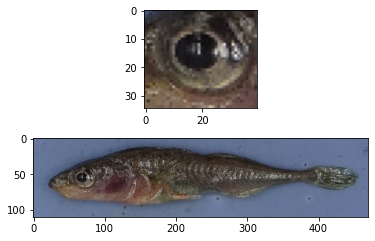

In [41]:
temp = np.copy(cv2.imread('../data/templates/eye1.png'))
image = np.copy(cv2.imread('../data/CC Lake extracted/5/DSC00839.jpg'))

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
print(temp.shape)

In [42]:
def match(image, temp0, slow=0.8, shigh=1.2, method =  cv2.TM_CCORR_NORMED): 
    best_match_score = 0
    best_res = None
    best_scale = 0
    # also rotate template
    for s in np.arange(slow, shigh, 0.05):
        temp = cv2.resize(temp0, None, fx = s, fy = s)
        temp_rot = rotate(temp, 180, mode = 'constant', reshape = False, cval = 0)
        res = cv2.matchTemplate(image, temp, method)
        res_rot = cv2.matchTemplate(image, temp_rot, method)
        if res.max() >= best_match_score:
            best_match_score = res.max()
            best_res = res
            best_scale = s 
            best_temp = temp
        elif res_rot.max() >= best_match_score:
            best_match_score = res_rot.max()
            best_res = res_rot
            best_scale = s 
            best_temp = temp_rot
    return (best_match_score, best_res, best_scale, best_temp)

DSC00849.JPG
0 0.86513066
(0, 5)
(0, 6)
0


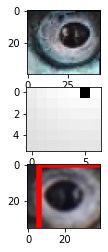

In [66]:
temp1 = cv2.imread('../data/templates/eye1.png')
# temp1 = cv2.gaussianBlur(temp1, kszie = (3, 3), sigmaX = 1, borderType = cv2.BORDER_REPLICATE) 
temp2 = cv2.imread('../data/templates/eye2.png')
# temp2 = cv2.gaussianBlur(temp2, kszie = (3, 3), sigmaX = 1, borderType = cv2.BORDER_REPLICATE) 
 
temp3 = cv2.imread('../data/templates/eye3.png')
# temp3 = cv2.gaussianBlur(temp2, kszie = (3, 3), sigmaX = 1, borderType = cv2.BORDER_REPLICATE)
temp4 = cv2.imread('../data/templates/eye4.png')
# temp4 = cv2.gaussianBlur(temp4, kszie = (3, 3), sigmaX = 1, borderType = cv2.BORDER_REPLICATE)
# print(temp1.shape, temp2.shape, temp3.shape)
# templst = [np.copy(temp1), np.copy(temp2), np.copy(temp3), np.copy(temp4)]
temp5 = cv2.imread('../data/templates/eye5.png')
templst = [np.copy(temp5)]

path = "../data/CC Lake extracted/5/"
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# for f in 
for f in onlyfiles[10:11]:
# for i in ['DSC00840.jpg', 'DSC00841.jpg', 'DSC00842.jpg', 'DSC00843.jpg']:
    image = cv2.imread('../data/templates/eye3.png')
#     image = cv2.imread(join(path, f))
# image = cv2.imread('../data/CC Lake extracted/5/DSC00839.jpg')
    img = cv2.GaussianBlur(np.copy(image), ksize = (3, 3), sigmaX = 1, borderType = cv2.BORDER_REPLICATE)
    scorelst = []
    reslst = []
    scalelst = []
    best_temps = []
    for temp0 in templst: 
        match_score, res, scale, best_temp = match(img, temp0, method = cv2.TM_CCORR_NORMED)
        scorelst.append(match_score)
        reslst.append(res)
        scalelst.append(scale)
        best_temps.append(best_temp)
    idx = np.array(scorelst).argmax()
    print(f)
    print(idx, scorelst[idx])
    
    h, w = best_temps[idx].shape[0:2]
    loc = np.unravel_index(reslst[idx].argmax(), reslst[idx].shape)
    print(loc)
    # remove the highest spot: 
    reslst[idx][loc[0], loc[1]] = 0
    loc = np.unravel_index(reslst[idx].argmax(), reslst[idx].shape)
    print(loc)
    # draw the template: 
    cornerr = loc[0]
    cornerc = loc[1]
    image_out = cv2.rectangle(img, (cornerc, cornerr), (cornerc + w, cornerr + h), (0, 0, 255), 2)
    print(idx)
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1)
    ax0.imshow(best_temps[idx])
    ax1.imshow(reslst[idx],cmap=plt.cm.gray)
    ax2.imshow(cv2.cvtColor(image_out, cv2.COLOR_BGR2RGB))

In [ ]:
image = cv2.imread('../data/CC Lake extracted/5/DSC00849.JPG');
RGBImage = cv2.cvtColor(np.copy(image), cv2.COLOR_BGR2RGB)

YIQ = np.zeros_like(image)
YIQ[:,:,0] = 0.299*RGBImage[:,:,0] + 0.587*RGBImage[:,:,1] + 0.114*RGBImage[:,:,2]
YIQ[:,:,1] = 0.596*RGBImage[:,:,0] - 0.274*RGBImage[:,:,1] - 0.322*RGBImage[:,:,2]
YIQ[:,:,2] = 0.211*RGBImage[:,:,0] - 0.523*RGBImage[:,:,1] + 0.312*RGBImage[:,:,2]

plt.imshow(YIQ)

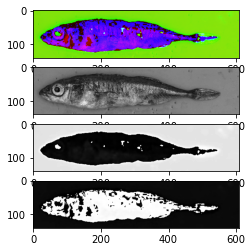

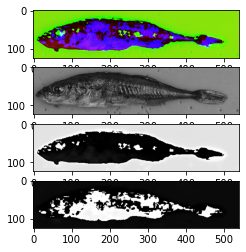

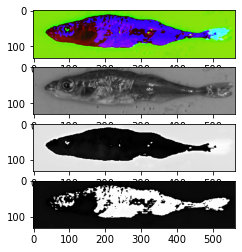

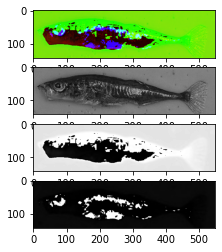

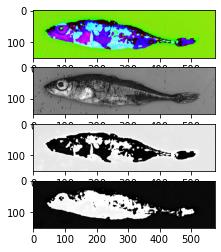

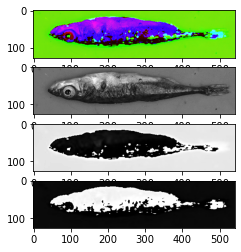

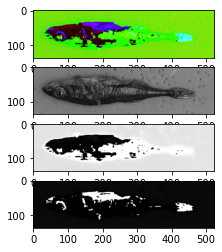

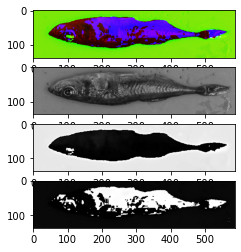

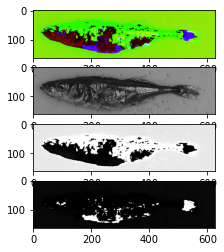

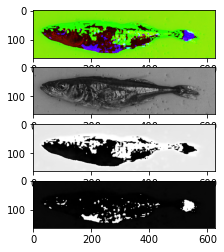

In [16]:
path = "../data/CC Lake extracted/5/"
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

for f in onlyfiles[5:15]:
# for i in ['DSC00840.jpg', 'DSC00841.jpg', 'DSC00842.jpg', 'DSC00843.jpg']:
    image = cv2.imread(join(path, f))
    RGBImage = cv2.cvtColor(np.copy(image), cv2.COLOR_BGR2RGB)
    YIQ = np.zeros_like(image)
    YIQ[:,:,0] = 0.299*RGBImage[:,:,0] + 0.587*RGBImage[:,:,1] + 0.114*RGBImage[:,:,2]
    YIQ[:,:,1] = 0.596*RGBImage[:,:,0] - 0.274*RGBImage[:,:,1] - 0.322*RGBImage[:,:,2]
    YIQ[:,:,2] = 0.211*RGBImage[:,:,0] - 0.523*RGBImage[:,:,1] + 0.312*RGBImage[:,:,2]
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1)
    ax0.imshow(YIQ)
    ax1.imshow(YIQ[:, :, 0], cmap=plt.cm.gray)
    ax2.imshow(YIQ[:, :, 1], cmap=plt.cm.gray)
    ax3.imshow(YIQ[:, :, 2], cmap=plt.cm.gray)

uint8
255 255


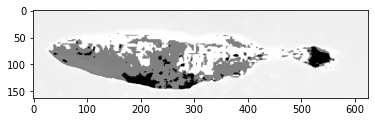

In [25]:
# get chrominance values
print(YIQ.dtype)
print(np.max(YIQ[:, :, 1]), np.max(YIQ[:, :, 2]))
Chrom = np.mean(np.array([YIQ[:, :, 1]/255, (1-YIQ[:, :, 2]/255)]), axis=0)
plt.imshow(Chrom, cmap=plt.cm.gray)

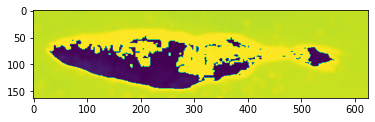

In [31]:
# dilation and erosion
dilation = cv2.dilate(YIQ[:, :, 1], cv2.getStructuringElement(cv2.MORPH_RECT, ksize = (3, 3)))
plt.imshow(dilation)

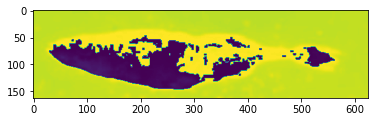

In [32]:
# erosion
erosion = cv2.erode(dilation, cv2.getStructuringElement(cv2.MORPH_RECT, ksize = (3, 3)))
plt.imshow(erosion)

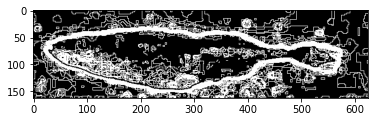

In [33]:
diff = erosion - dilation
plt.imshow(diff, cmap=plt.cm.gray)